In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1)  # Features
y = df['Target']  # Target variable

# It's good practice to standardize the data when using SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an SVM classifier
svc_model = SVC(probability=True)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define different scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Perform cross-validation
cv_results = cross_val_score(svc_model, X_scaled, y, cv=skf, scoring='accuracy')

# Output the mean and standard deviation of the accuracy
print(f'Accuracy for each fold: {cv_results}')
print(f'Mean accuracy: {cv_results.mean()}')
print(f'Standard deviation: {cv_results.std()}')

# If you want to compute other metrics, use cross_validate function instead
cv_results_full = cross_validate(svc_model, X_scaled, y, cv=skf, scoring=scoring)
print(f"Mean Precision: {cv_results_full['test_precision'].mean()}")
print(f"Mean Recall: {cv_results_full['test_recall'].mean()}")
print(f"Mean F1 Score: {cv_results_full['test_f1_score'].mean()}")


Accuracy for each fold: [0.71428571 0.57142857 1.         0.71428571 0.71428571 0.85714286
 0.71428571 0.57142857 0.83333333 0.83333333]
Mean accuracy: 0.7523809523809523
Standard deviation: 0.12517561360090398
Mean Precision: 0.7271428571428571
Mean Recall: 0.95
Mean F1 Score: 0.8178860028860029


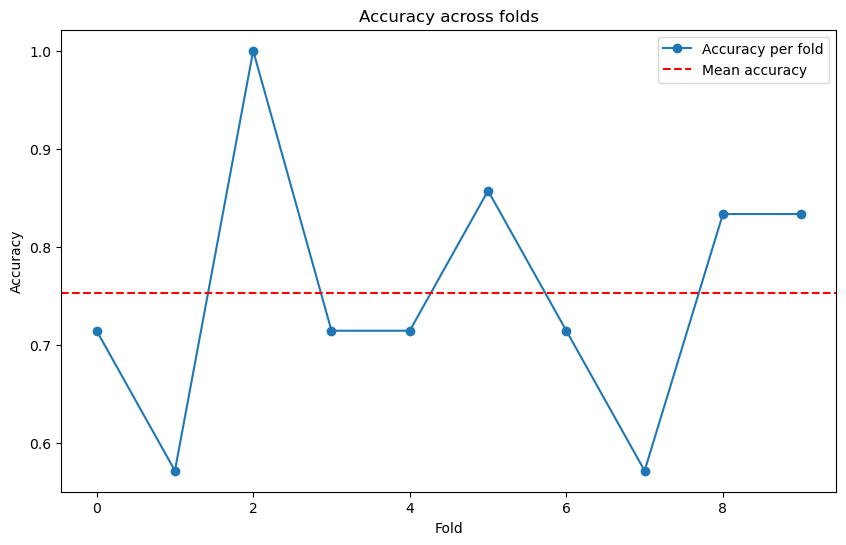

Mean Accuracy: 0.7523809523809523
Standard Deviation of Accuracy: 0.12517561360090398
Mean Precision: 0.7271428571428571
Mean Recall: 0.95
Mean F1 Score: 0.8178860028860029


In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1)  # Features
y = df['Target']  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an SVM classifier
svc_model = SVC(probability=True)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, pos_label=1),
           'recall': make_scorer(recall_score, pos_label=1),
           'f1_score': make_scorer(f1_score, pos_label=1)}

# Perform cross-validation
cv_results = cross_validate(svc_model, X_scaled, y, cv=skf, scoring=scoring)

# Plot accuracies for each fold
plt.figure(figsize=(10, 6))
plt.plot(cv_results['test_accuracy'], label='Accuracy per fold', marker='o')
plt.axhline(y=cv_results['test_accuracy'].mean(), color='r', linestyle='--', label='Mean accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy across folds')
plt.legend()
plt.show()

# Output the mean and standard deviation of the accuracy
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Standard Deviation of Accuracy: {cv_results['test_accuracy'].std()}")

# Output other metrics
print(f"Mean Precision: {cv_results['test_precision'].mean()}")
print(f"Mean Recall: {cv_results['test_recall'].mean()}")
print(f"Mean F1 Score: {cv_results['test_f1_score'].mean()}")


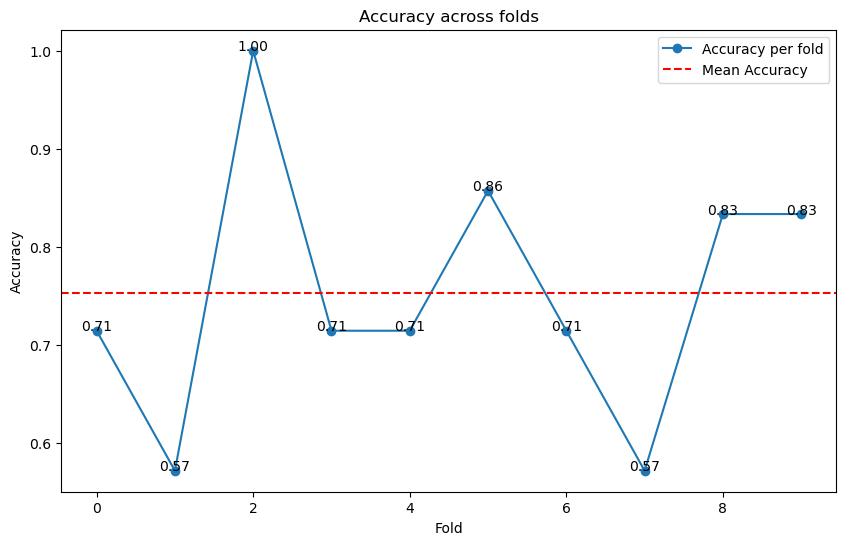

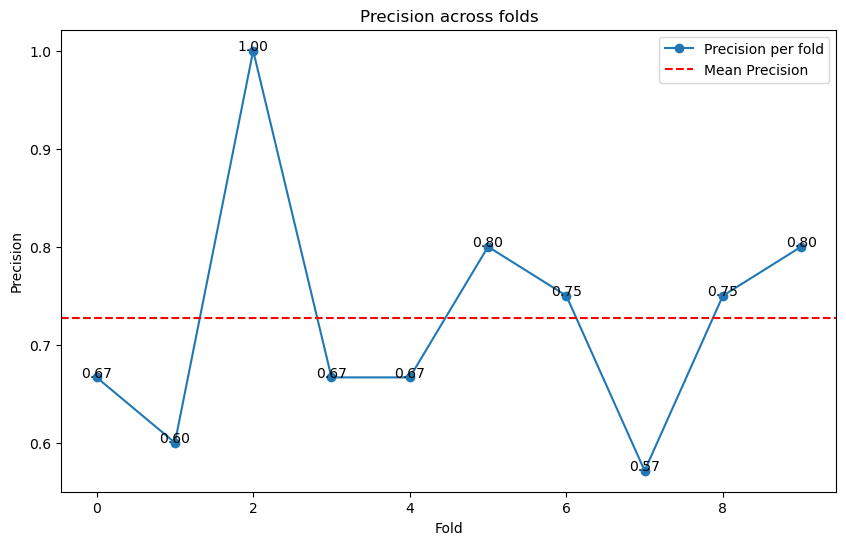

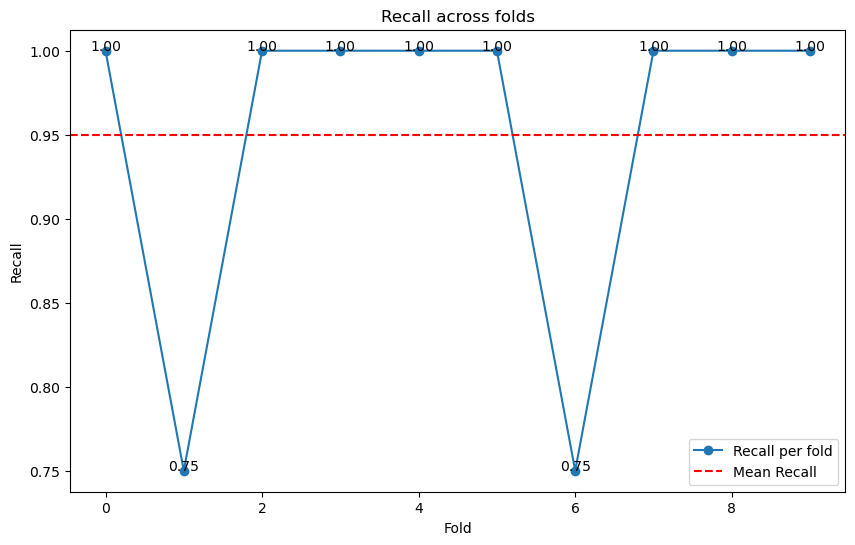

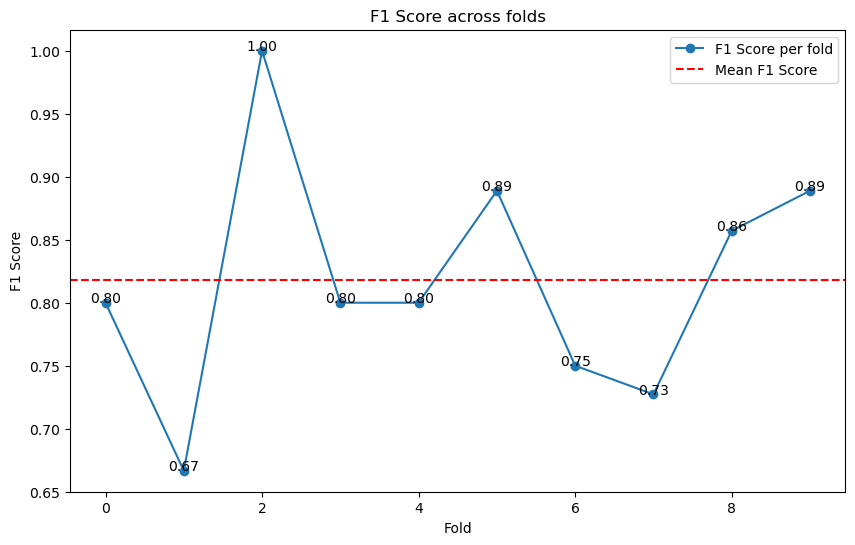

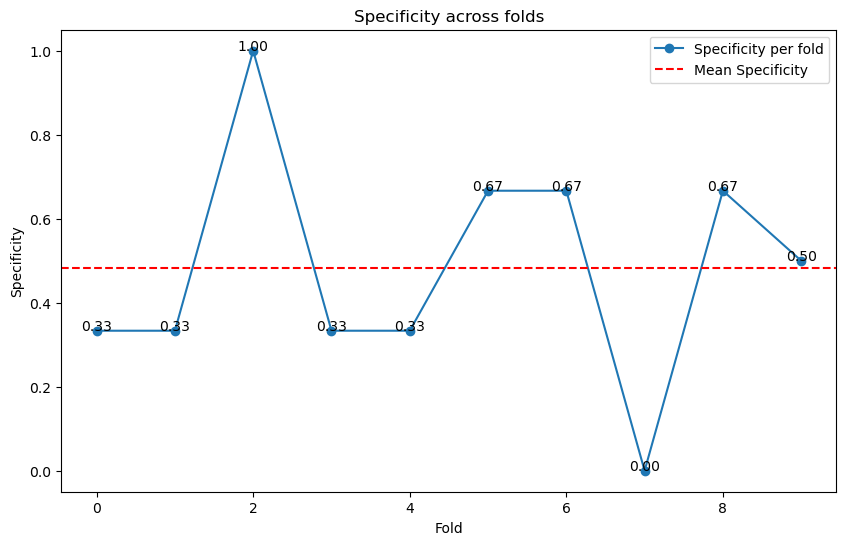

Mean Accuracy: 0.7523809523809523
Mean Precision: 0.7271428571428571
Mean Recall: 0.95
Mean F1 Score: 0.8178860028860029
Mean Specificity: 0.4833333333333333


In [7]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an SVM classifier
svc_model = SVC(probability=True)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# Perform cross-validation manually
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    svc_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svc_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the metrics
def plot_metric(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_metric(accuracies, 'Accuracy')

# Now let's plot other metrics
plot_metric(precisions, 'Precision')
plot_metric(recalls, 'Recall')
plot_metric(f1_scores, 'F1 Score')
plot_metric(specificities, 'Specificity')

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")


In [9]:
###SVM######

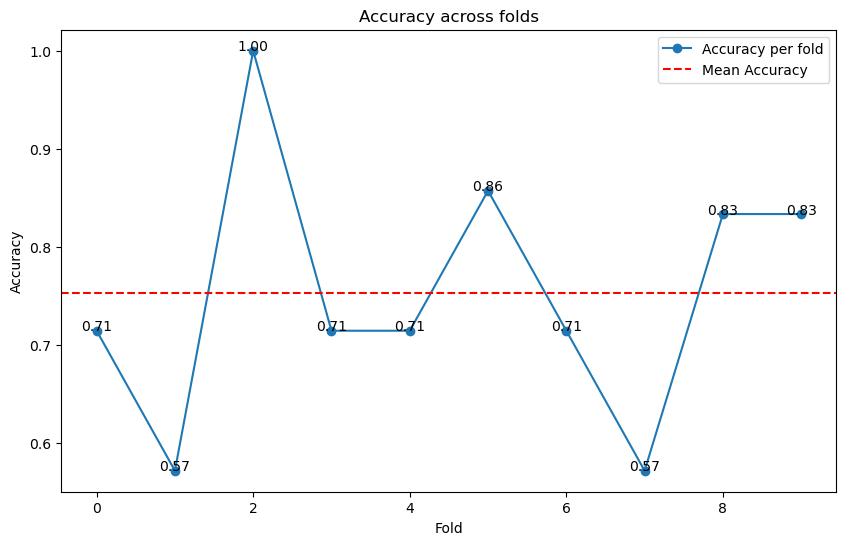

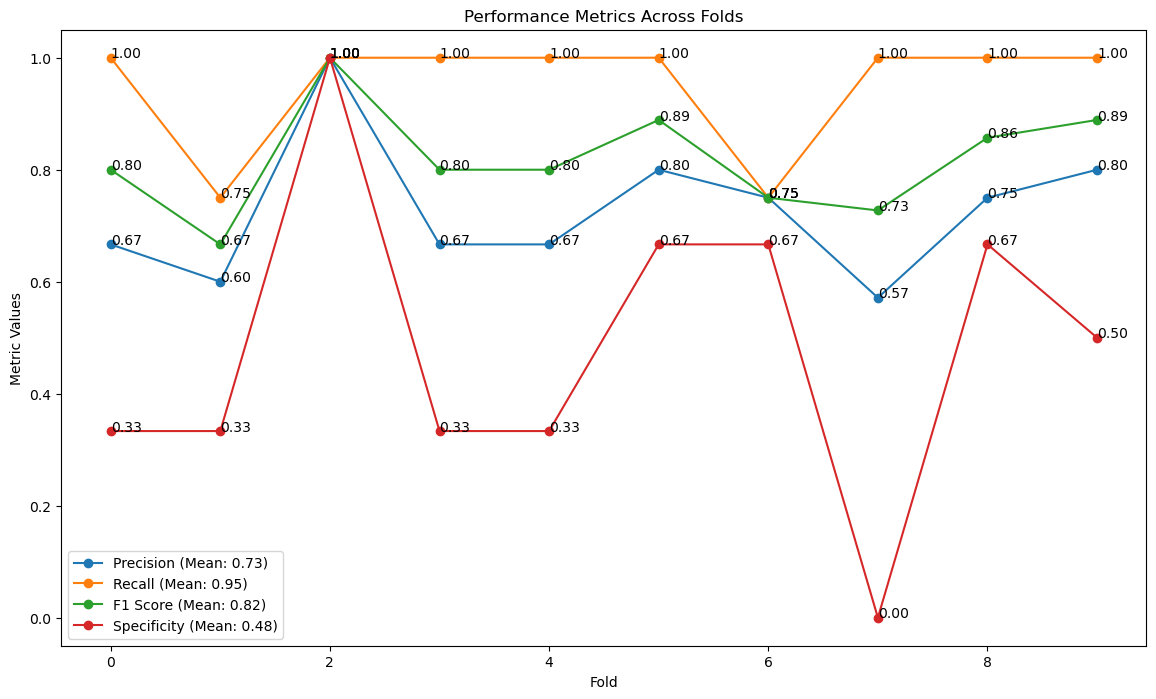

Mean Accuracy: 0.7523809523809523
Mean Precision: 0.7271428571428571
Mean Recall: 0.95
Mean F1 Score: 0.8178860028860029
Mean Specificity: 0.4833333333333333


In [8]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an SVM classifier
svc_model = SVC(probability=True)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# Perform cross-validation manually
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    svc_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svc_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the accuracy metric
def plot_accuracy(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Function to plot other metrics
def plot_other_metrics(metrics, metric_names):
    plt.figure(figsize=(14, 8))
    for metric, name in zip(metrics, metric_names):
        plt.plot(metric, label=f'{name} (Mean: {np.mean(metric):.2f})', marker='o')
        for i, value in enumerate(metric):
            plt.text(i, value, f'{value:.2f}')
    plt.xlabel('Fold')
    plt.ylabel('Metric Values')
    plt.title('Performance Metrics Across Folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_accuracy(accuracies, 'Accuracy')

# Plot other metrics
plot_other_metrics([precisions, recalls, f1_scores, specificities], 
                   ['Precision', 'Recall', 'F1 Score', 'Specificity'])

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")


In [10]:
#####Decesion Tree#####

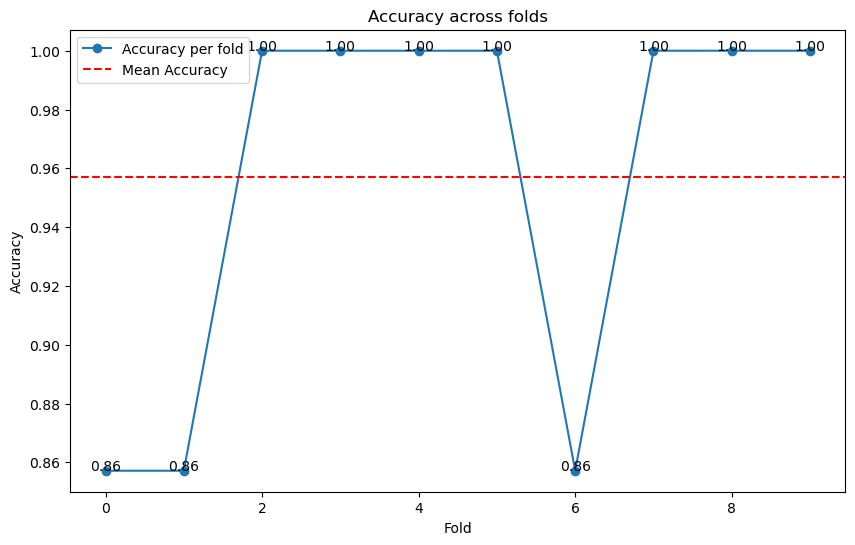

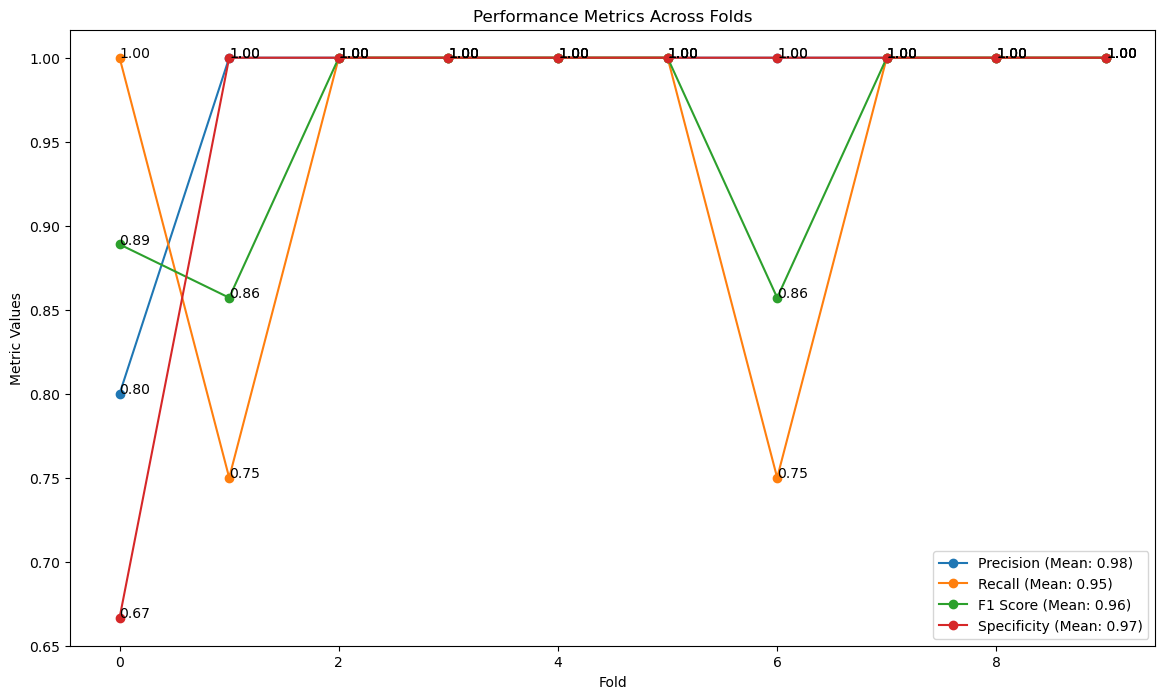

Mean Accuracy: 0.9571428571428571
Mean Precision: 0.9800000000000001
Mean Recall: 0.95
Mean F1 Score: 0.9603174603174602
Mean Specificity: 0.9666666666666666


In [11]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# Perform cross-validation manually
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    dt_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dt_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the accuracy metric
def plot_accuracy(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Function to plot other metrics
def plot_other_metrics(metrics, metric_names):
    plt.figure(figsize=(14, 8))
    for metric, name in zip(metrics, metric_names):
        plt.plot(metric, label=f'{name} (Mean: {np.mean(metric):.2f})', marker='o')
        for i, value in enumerate(metric):
            plt.text(i, value, f'{value:.2f}')
    plt.xlabel('Fold')
    plt.ylabel('Metric Values')
    plt.title('Performance Metrics Across Folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_accuracy(accuracies, 'Accuracy')

# Plot other metrics
plot_other_metrics([precisions, recalls, f1_scores, specificities], 
                   ['Precision', 'Recall', 'F1 Score', 'Specificity'])

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")


In [12]:
####Random Forest#####

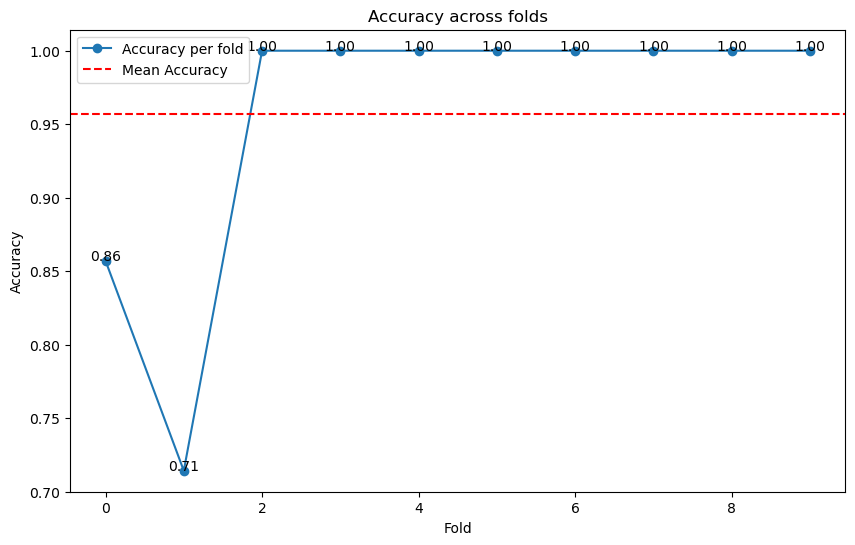

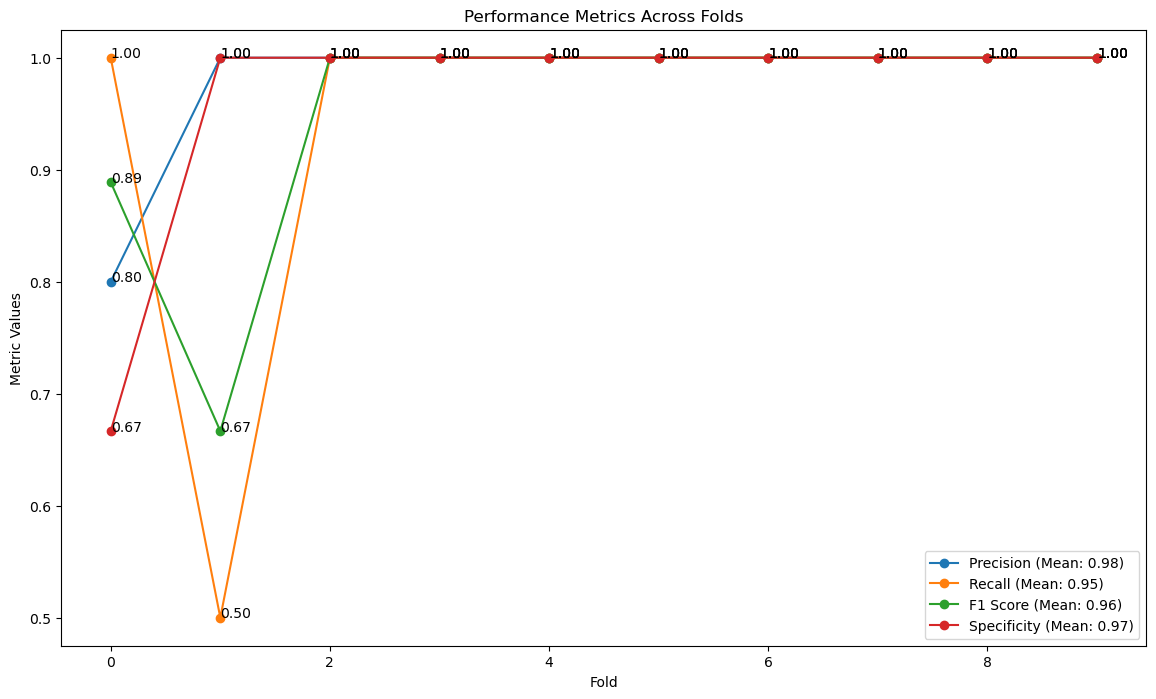

Mean Accuracy: 0.9571428571428571
Mean Precision: 0.9800000000000001
Mean Recall: 0.95
Mean F1 Score: 0.9555555555555555
Mean Specificity: 0.9666666666666666


In [13]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# Perform cross-validation manually
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the accuracy metric
def plot_accuracy(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Function to plot other metrics
def plot_other_metrics(metrics, metric_names):
    plt.figure(figsize=(14, 8))
    for metric, name in zip(metrics, metric_names):
        plt.plot(metric, label=f'{name} (Mean: {np.mean(metric):.2f})', marker='o')
        for i, value in enumerate(metric):
            plt.text(i, value, f'{value:.2f}')
    plt.xlabel('Fold')
    plt.ylabel('Metric Values')
    plt.title('Performance Metrics Across Folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_accuracy(accuracies, 'Accuracy')

# Plot other metrics
plot_other_metrics([precisions, recalls, f1_scores, specificities], 
                   ['Precision', 'Recall', 'F1 Score', 'Specificity'])

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")


In [14]:
#####K-NN######

C:\Users\MAHE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


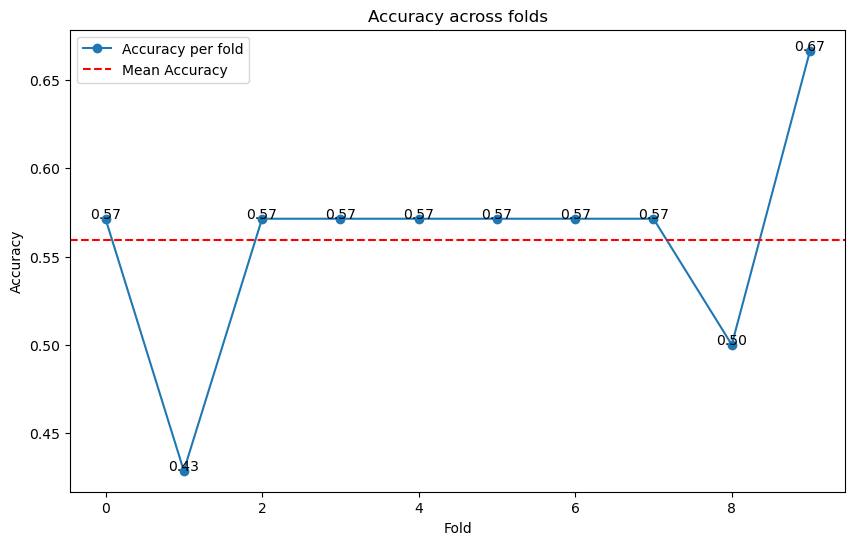

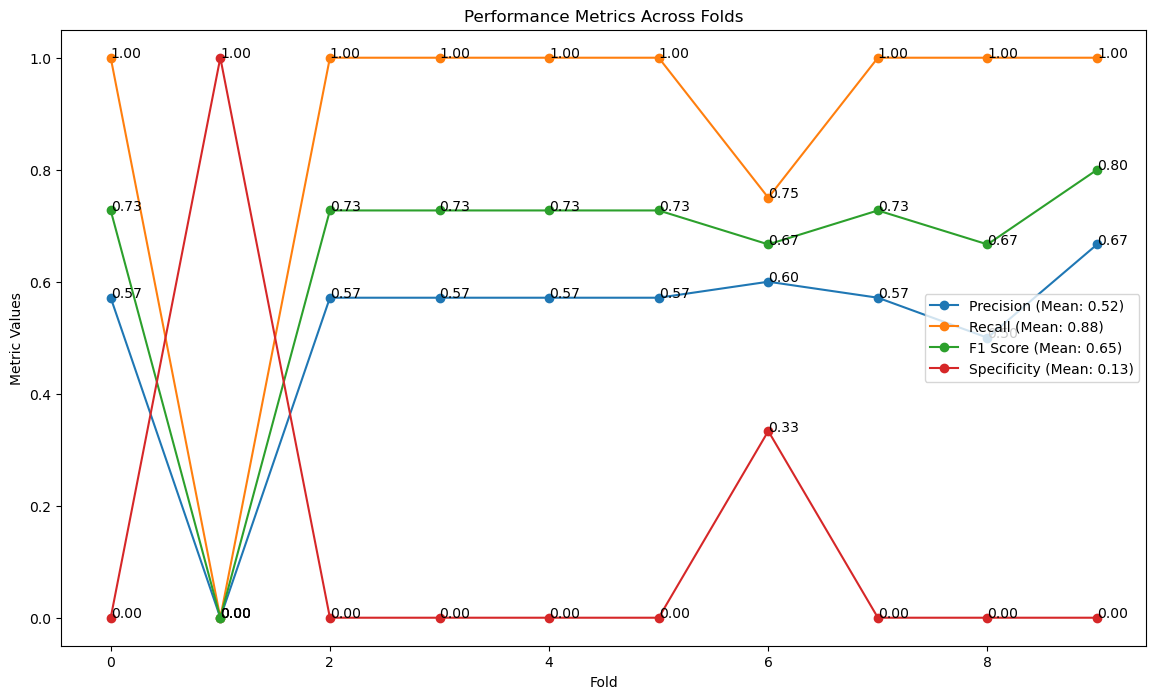

Mean Accuracy: 0.5595238095238095
Mean Precision: 0.5195238095238095
Mean Recall: 0.875
Mean F1 Score: 0.6496969696969697
Mean Specificity: 0.13333333333333333


In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")
# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a k-NN Classifier
# Setting n_neighbors as 5 as a starting point, you can tune this parameter based on performance
knn_model = KNeighborsClassifier(n_neighbors=5)

# Create a StratifiedKFold object to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# Perform cross-validation manually
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    knn_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the accuracy metric
def plot_accuracy(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Function to plot other metrics
def plot_other_metrics(metrics, metric_names):
    plt.figure(figsize=(14, 8))
    for metric, name in zip(metrics, metric_names):
        plt.plot(metric, label=f'{name} (Mean: {np.mean(metric):.2f})', marker='o')
        for i, value in enumerate(metric):
            plt.text(i, value, f'{value:.2f}')
    plt.xlabel('Fold')
    plt.ylabel('Metric Values')
    plt.title('Performance Metrics Across Folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_accuracy(accuracies, 'Accuracy')

# Plot other metrics
plot_other_metrics([precisions, recalls, f1_scores, specificities], 
                   ['Precision', 'Recall', 'F1 Score', 'Specificity'])

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")


In [16]:
###ANN####

Score for fold 1: loss of 0.9604905247688293; accuracy of 42.85714328289032%
Score for fold 2: loss of 0.05595695972442627; accuracy of 100.0%
Score for fold 3: loss of 0.06293675303459167; accuracy of 100.0%
Score for fold 4: loss of 0.00873760785907507; accuracy of 100.0%
Score for fold 5: loss of 0.005487274844199419; accuracy of 100.0%
Score for fold 6: loss of 0.004051022231578827; accuracy of 100.0%
Score for fold 7: loss of 0.0065662553533911705; accuracy of 100.0%
Score for fold 8: loss of 0.0007427361560985446; accuracy of 100.0%
Score for fold 9: loss of 0.0004057201149407774; accuracy of 100.0%
Score for fold 10: loss of 0.0004528579593170434; accuracy of 100.0%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.9604905247688293 - Accuracy: 42.85714328289032%
------------------------------------------------------------------------
> Fold 2 - Loss: 

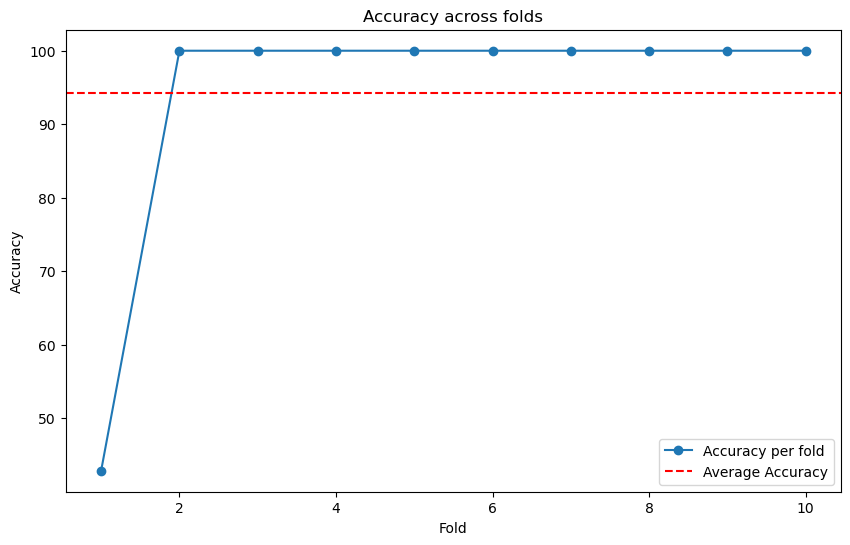

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Keras model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=X_scaled.shape[1], activation='relu'),  # Hidden layer with 12 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with a single neuron
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare k-fold cross-validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Arrays for storing scores
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_scaled, y):
    # Fit the model
    history = model.fit(X_scaled[train], y[train], epochs=150, verbose=0)
    
    # Generate generalization metrics
    scores = model.evaluate(X_scaled[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# Plot accuracy for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_folds+1), acc_per_fold, label='Accuracy per fold', marker='o')
plt.axhline(y=np.mean(acc_per_fold), color='r', linestyle='--', label=f'Average Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy across folds')
plt.legend()
plt.show()


1/1 [==============================] - 0s 36ms/step


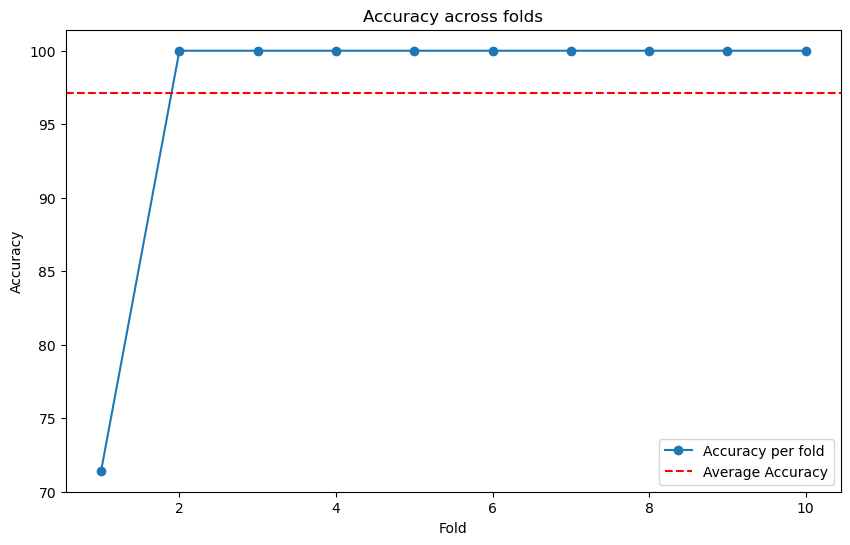

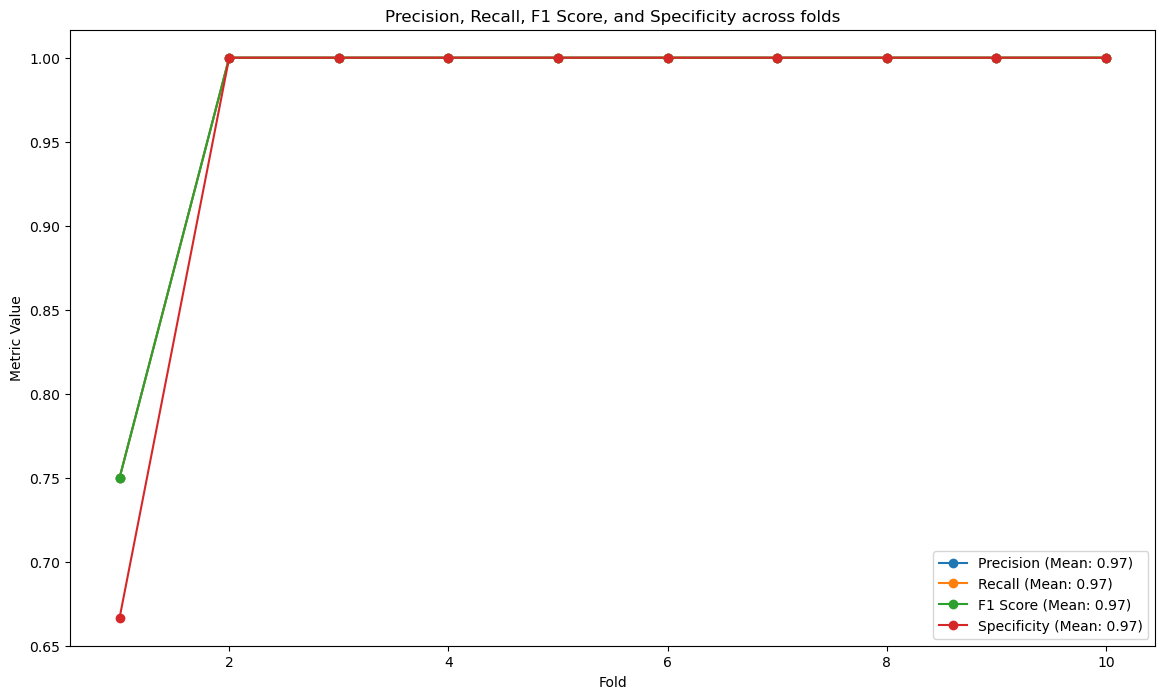

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Keras model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=X_scaled.shape[1], activation='relu'),  # Hidden layer with 12 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with a single neuron
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare k-fold cross-validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Arrays for storing scores
acc_per_fold = []
loss_per_fold = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    # Fit the model
    model.fit(X_scaled[train], y[train], epochs=150, verbose=0)
    
    # Generate generalization metrics
    y_pred_prob = model.predict(X_scaled[test]).ravel()
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)
    
    # Calculate and append metrics
    acc_per_fold.append(accuracy_score(y[test], y_pred) * 100)
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    f1_scores.append(f1_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Plot accuracy for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_folds+1), acc_per_fold, label='Accuracy per fold', marker='o')
plt.axhline(y=np.mean(acc_per_fold), color='r', linestyle='--', label=f'Average Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy across folds')
plt.legend()
plt.show()

# Plot other metrics
metrics = [precisions, recalls, f1_scores, specificities]
metric_names = ['Precision', 'Recall', 'F1 Score', 'Specificity']
plt.figure(figsize=(14, 8))
for metric, label in zip(metrics, metric_names):
    plt.plot(range(1, num_folds+1), metric, label=f'{label} (Mean: {np.mean(metric):.2f})', marker='o')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, F1 Score, and Specificity across folds')
plt.legend()
plt.show()


1/1 [==============================] - 0s 43ms/step


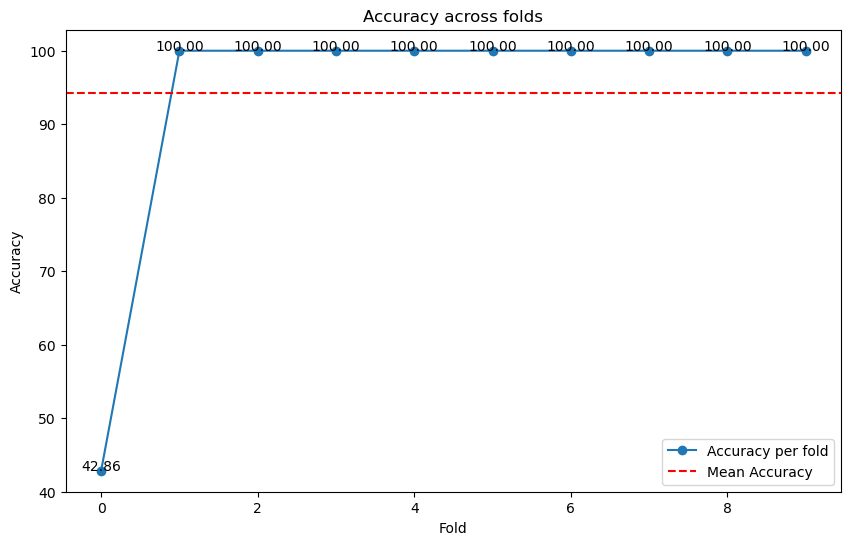

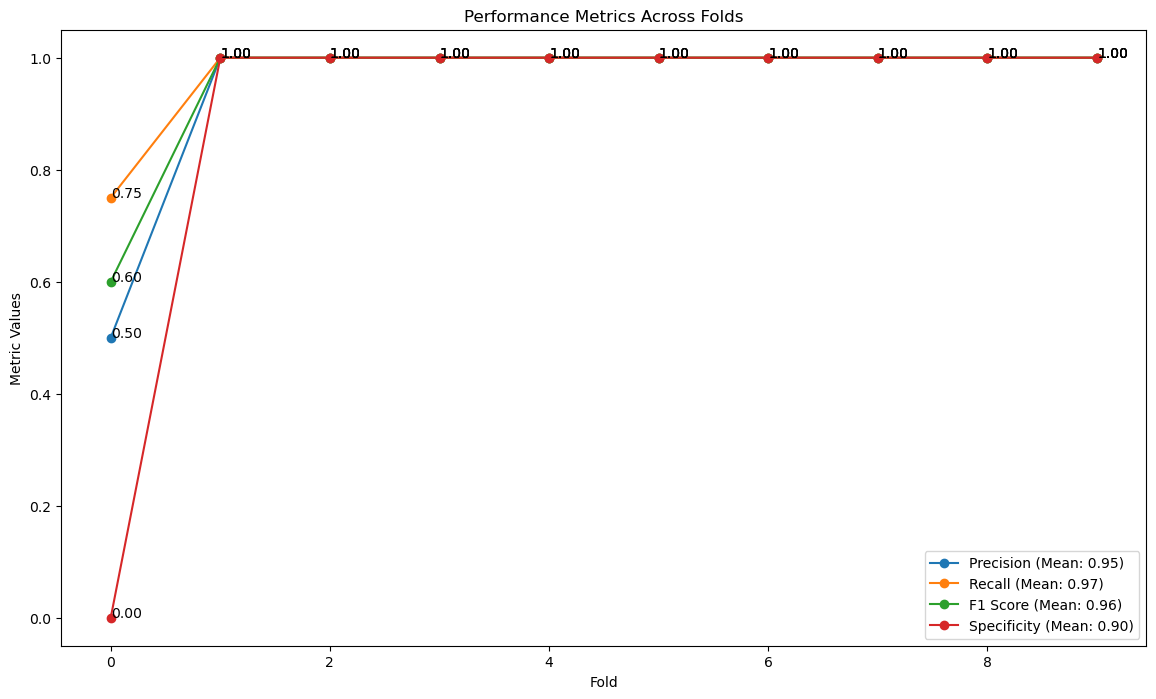

Mean Accuracy: 94.28571428571429
Mean Precision: 0.95
Mean Recall: 0.975
Mean F1 Score: 0.96
Mean Specificity: 0.9


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the reduced dataset
df = pd.read_csv(r"C:\Users\MAHE\Documents\csv data\PCAReduced__Data_BreastCancer.csv")

# Split the dataset into features and target variable
X = df.drop(['Description', 'Target'], axis=1).values  # Features
y = df['Target'].values  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Keras model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=X_scaled.shape[1], activation='relu'),  # Hidden layer with 12 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with a single neuron
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare k-fold cross-validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X_scaled, y):
    # Fit the model
    model.fit(X_scaled[train], y[train], epochs=150, verbose=0)
    
    # Generate generalization metrics
    y_pred_prob = model.predict(X_scaled[test]).ravel()
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)
    
    # Calculate and append metrics
    accuracies.append(accuracy_score(y[test], y_pred) * 100)
    precisions.append(precision_score(y[test], y_pred))
    recalls.append(recall_score(y[test], y_pred))
    f1_scores.append(f1_score(y[test], y_pred))
    tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Function to plot the accuracy metric
def plot_accuracy(metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(metric_values, label=f'{metric_name} per fold', marker='o')
    plt.axhline(y=np.mean(metric_values), color='r', linestyle='--', label=f'Mean {metric_name}')
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center')
    plt.xlabel('Fold')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} across folds')
    plt.legend()
    plt.show()

# Function to plot other metrics
def plot_other_metrics(metrics, metric_names):
    plt.figure(figsize=(14, 8))
    for metric, name in zip(metrics, metric_names):
        plt.plot(metric, label=f'{name} (Mean: {np.mean(metric):.2f})', marker='o')
        for i, value in enumerate(metric):
            plt.text(i, value, f'{value:.2f}')
    plt.xlabel('Fold')
    plt.ylabel('Metric Values')
    plt.title('Performance Metrics Across Folds')
    plt.legend()
    plt.show()

# Plot accuracy with values
plot_accuracy(accuracies, 'Accuracy')

# Plot other metrics
plot_other_metrics([precisions, recalls, f1_scores, specificities], 
                   ['Precision', 'Recall', 'F1 Score', 'Specificity'])

# Print the mean and standard deviation of each metric
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Specificity: {np.mean(specificities)}")
